In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets

from collections import Counter

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(123)

In [25]:
class KNN:
    def __init__(self, k= 3):
        self.k = 3
     
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    
    def predict(self, X):
        y_pred = [self.helper_predict(x) for x in X]
        return np.array(y_pred)
    
    
    def helper_predict(self, x):
        #train setindeki mesafeleri hesapla
        distance = [self.ecludian_dis(x, x_train) for x_train in self.X_train]
        
        #k ya gore komşulara bak
        k_index = np.argsort(distance)[:self.k]
        k_neigborh_labels = [self.y_train[i] for i in k_index]
        most_k = Counter(k_neigborh_labels).most_common(1)
        return most_k[0][0]
               
    
    def ecludian_dis(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [72]:
X, y = datasets.make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=21)
print(f"{X.shape}, {y.shape}")

(1000, 2), (1000,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

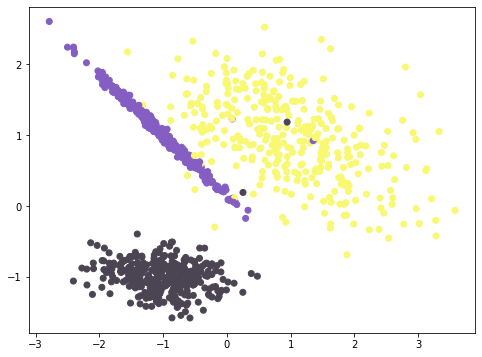

In [74]:
cmap = ListedColormap(["#F9F871", "#845EC2", "#4B4453"])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c = y, cmap= cmap)
plt.show()

In [75]:
model = KNN(k = 5)

In [76]:
model.fit(X_train, y_train)

In [78]:
y_pred = model.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.985

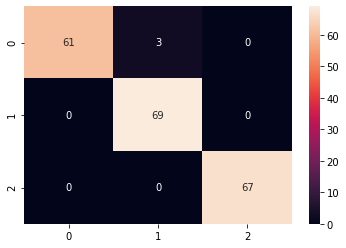

In [82]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True);